In [1]:
import pandas as pd
import json

from pandas import Series, DataFrame
import numpy as np
np.seterr(divide='raise', over='raise', under='raise', invalid='raise')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [2]:
# Load data for Cleveland
data_path = './data/cleveland/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [3]:
display(reviews.head())
display(businesses.head())
display(users.head())
display(tips.head())
display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18
1,36xxeOr4m4UlRf9FM1HzdA,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,1,0,0,I took my wife out for a Birthday dinner with ...,2014-12-17 19:34:47
2,4PKiLkFTff9HK44QkOo6vA,vDlrf84X8yu-CZ-8isrOSw,anzCdD5eIEHwydTpXhLlUA,4.0,0,0,1,Heard about this place and was dying to check ...,2015-01-03 20:45:05
3,ydehlths0Zpg2gbXPOs6Qw,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,1,0,0,Also don't believe when they say they will giv...,2015-03-04 19:46:32
4,a_g4eysuYC1pI9tv3MCZxA,QaN-nccbLZPWzownQYgTVQ,LzWROAt-RhgaBss4cOoDRQ,4.0,11,3,4,I love the West Side Market but I can't stand ...,2013-08-03 15:06:21


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,11,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Medical Centers",None
1,OwXMxqxIy4YoprAjnoUoiA,B & M Bar-B-Que Shaw,12700 Shaw Ave,Cleveland,OH,44108,41.540890,-81.595327,3.5,4,1,"{'GoodForKids': 'False', 'RestaurantsReservati...","Barbeque, Restaurants",None
2,3e0IGa_-zqTemKLc1dbdmg,Phusion Cafe,11611 Euclid Ave,Cleveland,OH,44106,41.510985,-81.603050,3.5,17,1,"{'OutdoorSeating': 'False', 'WiFi': ''no'', 'G...","Restaurants, Taiwanese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,_RTnzQumsGrs3n4XuJaDQg,Scorchers,1701 E 12th St,Cleveland,OH,44114,41.502996,-81.685414,3.0,6,0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Nightlife, Bars, Sports Bars",None
4,x5mv33siyWGXVpOmLACfPQ,Brook Park Laser Wash,5673 Smith Rd,Cleveland,OH,44142,41.409087,-81.803309,1.5,5,1,None,"Automotive, Car Wash",None


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,AWCY8laHjH0-3HMT0LGpUA,Jin,732,2010-07-09 15:53:01,1104,417,586,"2011,2012,2013,2014,2015,2016","Xqo1ru1F7srvbUJaCNHkvQ, v5LvxWrscDM7XKpD6f0WxQ...",71,...,8,11,18,8,83,196,185,185,56,42
2,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018","2Y1pwMu2pZJDGQ7moD-2gQ, Qlys2g0R3PfNAuMOhagwLA...",77,...,3,4,1,1,60,64,140,140,120,65
3,d7D4dYzF6THtOx9imf-wPw,Regina,1053,2008-12-05 07:16:22,11769,6997,9594,"2013,2014,2015,2016,2017,2018","SxSeTYznS0YKSISgs5hj_Q, VtnCudEFLBjnxblLUAPYhA...",231,...,46,29,9,5,419,611,822,822,475,338
4,LQbuEFUxqB0Ekt7Ps9ZnJA,Shelby,98,2012-02-26 18:43:59,115,22,21,,"AS2i47y2v1AXz22nrfeJow, Mw0GPZTiVfE9eS0Db-xDaQ...",1,...,0,0,0,0,0,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,aoO6EXKupIDDDMMK4PG-iw,e7207sqC-pSn6GIf31ikhQ,Birthday breakfast!,2013-02-21 13:29:23,0
1,BceBAi4nnMWiUsKALGMg3A,mdUnUYQoXTouoziuLzaR0g,Ask for Sharon if you're getting a pedicure!,2012-03-21 12:43:01,0
2,dt9IHwfuZs9D9LOH7gjNew,UoRSHohdGuzfrpydZ9j0Lg,99 cent tacos on Tuesday. $2 enchilada Wednesd...,2014-03-28 18:19:15,0
3,sQnWKfulPIUxN26yvcA2_w,bupMXFUaZfranBLdaVcRww,Shrimp tempura is awesome more like sushi,2012-08-01 23:36:09,0
4,NfU0zDaTMEQ4-X9dbQWd9A,mLjDh0vQYBCY6g9T1HczVw,A little taste of home before flying out acros...,2014-03-13 15:26:28,0


,business_id,date
0,-1vulUmD1pYf0uvXBY1Fzg,"2015-08-01 01:12:20, 2015-08-29 00:02:11, 2015..."
1,-5sQihzwgmq7tuAyUh7RSw,"2011-01-02 19:58:59, 2011-01-10 19:03:04, 2011..."
2,-D8DPlf_b5EBTFhsTjFdZw,"2013-04-19 18:30:27, 2016-06-16 15:05:27, 2016..."
3,-DU8jf5nA1_yaOqsKsLqmw,"2012-05-19 00:26:19, 2013-04-25 21:31:35, 2013..."
4,-DYPu72JHFKno3lAaUWyFw,"2010-06-13 22:29:41, 2010-07-04 23:25:18, 2010..."


In [4]:
# Optioneel: verwijder de longtail (alle bedrijven met minder dan bepaald aantal reviews)
index = reviews.groupby(['business_id'])
reviews = index.filter(lambda x: x['business_id'].count() >= 0)

def split_data(data, d = 0.75):
    """ split data in a training and test set 
       `d` is the fraction of data in the training set"""
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

training_data, test_data = split_data(reviews)


In [5]:
def extract_categories(businesses):
    """Create an unfolded genre dataframe. Unpacks categories seprated by a ',' into seperate rows.

    Arguments:
    movies -- a dataFrame containing at least the columns 'business_id' and 'categories' 
              where categories are seprated by ','
    """
    businesses = businesses.drop(businesses[businesses['categories'].isna()].index)
    categories_m = businesses.apply(lambda row: pd.Series([row['business_id']] + row['categories'].lower().split(",")), axis=1)
    stack_categories = categories_m.set_index(0).stack()
    df_stack_categories = stack_categories.to_frame()
    df_stack_categories['business_id'] = stack_categories.index.droplevel(1)
    df_stack_categories.columns = ['categorie', 'business_id']
    return df_stack_categories.reset_index()[['business_id', 'categorie']]

business_categories = extract_categories(businesses)
business_categories['categorie'] = business_categories['categorie'].apply(lambda x: x.strip())

In [6]:
def pivot_ratings(ratings):
    """ takes a rating table as input and computes the utility matrix """
    ratings.drop_duplicates(['business_id', 'user_id'], keep='first', inplace=True)
    return (ratings.pivot(index='business_id', columns='user_id', values = 'stars').fillna(np.nan))


In [7]:
def categorie_splitter(tags):
    subset_ids = business_categories[business_categories['categorie'].isin(tags)]['business_id']
    subset = training_data[training_data['business_id'].isin(subset_ids)]
    return subset 

def utility_maker(tags):
    categories = categorie_splitter(tags)
    utility = pivot_ratings(categories)
    return utility

# maak utility matrices voor de verschillende categorieen
utility_restaurants = utility_maker(['restaurants', 'food'])
utility_nightlife = utility_maker(['nightlife', 'bars'])
utility_shopping = utility_maker(['shopping'])
utility_automotive = utility_maker(['automotive'])

display(utility_restaurants.head(), utility_nightlife.head(), utility_shopping.head(), utility_automotive.head())

C:\Users\Iris Reitsma\Anaconda2\envs\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


user_id,--Awhttr0FhVud5prVpVlA,--U0loZF9HaSPRzrGuiWLg,--Un3i23CtaotdPrjjU4oA,--Yu8KhNFv0-OqPdBZoOZQ,--_nP6G2mAHyrEFtIG6ggw,--amZ_cR9Zgu4B1RrAHJyA,-01kVTKImAOZTyAGAn-YZg,-0S_XaK3Q_Mesal2Unta2w,-0Xu57zrI3Rxi8wGZsnWKQ,-0YN7DR3V0ynR9ureBeOKA,...,zyo-ZIF0jxeZh88gXL45Fw,zyoSjBxxWkE7spafdUVeJw,zyrN4EvznY28IiiMvo_gTQ,zyrsLcN4dyRaySc257MsaQ,zz4tDRLYW0CSLPvdAD9VHg,zz8qDpBF_Qup2WIfwbYPOQ,zzANVqPhjzspu3x8CmHQ0Q,zzDln8w4vq4ePQgnV0tWFA,zzL4E_gdoSCtgNhW4BPY8w,zzqEHVtLUCaXCW1vPRSFEw
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-DkhPijabXuTNvNteIpRPw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Eu04UHRqmGGyvYRDY8-tg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-F0B5F1YLx7093otwgboxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-GQzMguGfB4jswo8jAO7CQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


user_id,--Awhttr0FhVud5prVpVlA,--Yu8KhNFv0-OqPdBZoOZQ,--_nP6G2mAHyrEFtIG6ggw,--amZ_cR9Zgu4B1RrAHJyA,-0452IkNZtHQbzSVf5uTwA,-0S_XaK3Q_Mesal2Unta2w,-0cu1eLTYG-TJCer9VVF9A,-0x2ov-qcCopv32Imm-TYg,-15vBHK0n-ejyxY418MvHA,-1YGFe7qDm2yl43AqCbMNg,...,zwFfSeQoLaeWUptFoo_hOA,zxA6KTqMirq7EsaIH93LSA,zxGejXvesnPiiMVmuvZjYQ,zxLlkf-VCIQAjwiwMOWYiA,zxRHyxQm-32j5Z7Pi7bHCA,zxmQgVo3BJxHxpRqGQZJgA,zy4NqQpPWNRftutQEhVb1g,zyCQ79zBjvY4XtKzuEEwYQ,zyoSjBxxWkE7spafdUVeJw,zzDln8w4vq4ePQgnV0tWFA
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-F0B5F1YLx7093otwgboxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-w5BFWp06d7MFfwKNNqUsw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0-jqS5y4D-6Zohb3Q375ZQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0FXAHiDs1Fkr3V_kK8b1SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


user_id,-0dgiealNJ3AeX9RmI8F5A,-11CHis1MMgHAuDUXgmBKw,-4UYrm18j2vQ27iR5JOX2g,-6TGxmTFJBWVx9E7oLcerw,-6gw8AR7FHcy5TYnBM3wdA,-6rHAQD7cuWVAVPE1ClIOw,-ApNacRfrMusTHScxP4E5w,-BwNk3oPt2nl_4i7E-Ilbg,-DrY4zShd5TOrQD69-nxaQ,-GuR4HOAr58kpNBc5aQ2-g,...,zkyAckgbZ3mEnqAlLwqAvw,zmHbK_t6fxtFk5SnuSn4lw,zmOjVizcqC-hGn_U0fPN1g,zpCpkAuQb669meNOgJw6PA,zpMvXReWlU4sKjY8mNW_QQ,zsB1L0kR0YzaBmMuKsZbjQ,zsq0Kysl5OVkLTUSEiEcbA,zu9sJ5YiHNDuu78-BTRg7Q,zxRHyxQm-32j5Z7Pi7bHCA,zxddeTFgG6cZDO4t_1BRwQ
business_id,,,,,,,,,,,,,,,,,,,,,
-Eu04UHRqmGGyvYRDY8-tg,NaN,NaN,4.0,5.0,NaN,NaN,5.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN
1Z6YrdtjD6hNzZRYpuNEsA,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3DP4oWhTgX7L9Tu1de9Y1g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5qsPirS6wfGyw6WpPBphuA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5uwVLzI6BowPAmQRe977Pw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


user_id,-62S7530a_htLZPWWEgh0Q,-HLE-x7Lpkfprd6er-JFGg,-MGPNimXk0IIfP1XpGaDFw,-XO-uuLnIvi_LmG2FfubmA,-Z_S3sfq8-GSNSz6IojDVA,-trO_iAihUKc2xe6oAFrTQ,-xhtu5a6cbadk1FQcSMMHQ,07dMu2RDPiGdlZHykjjyzw,09vrajXlT-QkknTMa51GAg,0B5KvqcoUBL0Rf2WTckiqw,...,z7Mfb3IxpL5mPoiphsRhmw,zISSIzkNWqBlPfZ_YvWD1A,zKvyv9bCDeHH1kXvUPeKcg,zLVxLQMyyh1vprWdbBoJZA,zUn1YhhC7ngOBiUoZF6r5Q,zfXm9g3fJExXfAqN39ygbw,zk9dbg8NM3gM3N8YM8nqDw,zmOjVizcqC-hGn_U0fPN1g,znXGgE2KkxqdIelaqdbB8w,zpMvXReWlU4sKjY8mNW_QQ
business_id,,,,,,,,,,,,,,,,,,,,,
-MQZ6z1-5xVwuiuE_rngQA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
28AALxbT27d3voK2as0ARg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5i29IeQe8bLrJEa2OzLi7g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-dEJi8wcNCjPCvcnlOeGg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83JNBq-zRL5txbzXgiBFGw,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def correlation(utility_matrix):
    utility_matrix = utility_matrix.T
    similarity_matrix = utility_matrix.corr(method = 'pearson')
    return similarity_matrix


In [9]:
# maak similarity matrix per categorie
similarity_restaurants = correlation(utility_restaurants)
similarity_nightlife = correlation(utility_nightlife)
similarity_shopping = correlation(utility_shopping)
similarity_automotive = correlation(utility_automotive)

display(similarity_restaurants.head(), similarity_nightlife.head(), similarity_shopping.head(), similarity_automotive.head())

business_id,-1vulUmD1pYf0uvXBY1Fzg,-DkhPijabXuTNvNteIpRPw,-Eu04UHRqmGGyvYRDY8-tg,-F0B5F1YLx7093otwgboxw,-GQzMguGfB4jswo8jAO7CQ,-Glmj_sxqCu0F3G62kFt1Q,-HuLsSQZDJfPghKgFEDG-g,-Mm4YqCDM5CqSDDh7HI6Zw,-V-fpvR47iZJ5jq8Eit7ng,-_DxZ8gKU50sfuZEu4ypKg,...,zH3HFpkJZ9EmWMRhw1oypA,zKJ4KcZAfTNBIM7OvkVv3A,zKaeae3yRGgb21Os-v6eOA,zYbEKtLeosxhTzF4zSRIyA,zZa54XuYySbT1DI2WG4i3A,ziTgeXaM7gWRnIhPtespMQ,zjygAC4qLf91b3KOdHQT-w,zo9fKM_Sty6qGztXKoMPmQ,zqRTnP_JQv94nuoyO7xCQg,zwXi28HGMAI5MyCOBdYtcg
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-DkhPijabXuTNvNteIpRPw,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
-Eu04UHRqmGGyvYRDY8-tg,NaN,NaN,1.000000,-0.559017,NaN,NaN,NaN,-1.0,0.091287,4.532467e-17,...,NaN,-0.188982,NaN,NaN,0.333333,NaN,-0.104852,NaN,0.25,NaN
-F0B5F1YLx7093otwgboxw,NaN,NaN,-0.559017,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-GQzMguGfB4jswo8jAO7CQ,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


business_id,-1vulUmD1pYf0uvXBY1Fzg,-F0B5F1YLx7093otwgboxw,-w5BFWp06d7MFfwKNNqUsw,0-jqS5y4D-6Zohb3Q375ZQ,0FXAHiDs1Fkr3V_kK8b1SA,0LAjD6m5LjiSbiajp2SR4Q,0S4mVrhhSfTsKRtBF_W_BQ,0ZZIqTdEb7yUa13QZLKuGQ,1FbPiw_tWdyjrUcJa41Zvg,1KRnx1P4gYlkpmezGTERaA,...,wxMDlB4MJ65CHQVxOYm5_w,wzj2cMpiDJW0HB3iCvCOYA,x5BiUv1ou1qrpBoJ9hGH4w,xnLNPkL7bbdhD842T4oPqg,yBsM_aIocvzLYIOSP5knjQ,yTv4ptghx8xrErx6dcW3HA,zB4w1HYzZ9tBwjLNvLNc3Q,zKaeae3yRGgb21Os-v6eOA,zZa54XuYySbT1DI2WG4i3A,zjygAC4qLf91b3KOdHQT-w
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-F0B5F1YLx7093otwgboxw,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-w5BFWp06d7MFfwKNNqUsw,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0-jqS5y4D-6Zohb3Q375ZQ,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
0FXAHiDs1Fkr3V_kK8b1SA,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


business_id,-Eu04UHRqmGGyvYRDY8-tg,1Z6YrdtjD6hNzZRYpuNEsA,3DP4oWhTgX7L9Tu1de9Y1g,5qsPirS6wfGyw6WpPBphuA,5uwVLzI6BowPAmQRe977Pw,6sAR0qQp1TiEBKsALJDzVA,72R6zu7hH6R-nfjvBkMUHQ,7Idi_H2WXAxyAruxVr2aSA,7PjQd4Bw0vsmtktm2YRuXA,7xWbvNsFeKaJTurdHFrnqw,...,rschLsESGfreHfWWJcd6eA,t-hA30pcDuonZTr4NpTKdg,tjqK6lgvoIbRkQ7QuKRAFQ,uv-e-d43NN-1_DcCoJL-Og,vbWcfGJcs_Hq8bdJuBCTVw,x5BiUv1ou1qrpBoJ9hGH4w,xezyjF7ddLjqNjG5sp3AzA,yKw8QhmHWzVjg1tU4anbeA,zKDuRdTHXYpRO2VjT9Azkg,zmyd5noZ9Fcy6d6Yf_PcHQ
business_id,,,,,,,,,,,,,,,,,,,,,
-Eu04UHRqmGGyvYRDY8-tg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661438,-2.128755e-17,...,-0.387298,NaN,-0.177667,NaN,NaN,NaN,NaN,0.707107,NaN,NaN
1Z6YrdtjD6hNzZRYpuNEsA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.660254e-01,...,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DP4oWhTgX7L9Tu1de9Y1g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5qsPirS6wfGyw6WpPBphuA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5uwVLzI6BowPAmQRe977Pw,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


business_id,-MQZ6z1-5xVwuiuE_rngQA,28AALxbT27d3voK2as0ARg,5i29IeQe8bLrJEa2OzLi7g,7-dEJi8wcNCjPCvcnlOeGg,83JNBq-zRL5txbzXgiBFGw,9tMawrxhVJ_ulRSIgQ83Qw,BDXod8xpyhjzePWDgdVhtA,D_ZVW8HKH7crSGqsg9KOoQ,JSRKD_CspxAevVOBSxZEvg,MQT5su7035AUTAltUfw5ug,...,nxZ0URq2u4jnvD6cC0UrNQ,oad18hHNEEr-T1FoeFtzNw,pDordxU1DuzYLFkKcVutCA,pgJOv_KHqkZ4gsK9gM-pMA,q5VNkt4l7_n8JAVq396E2w,rgdD0z1plae_ewOluEq8iQ,uuW5NAOduqX_7B4MsDPJSQ,uv-e-d43NN-1_DcCoJL-Og,vbWcfGJcs_Hq8bdJuBCTVw,wm6_ulokKWvKo01dy7VQvw
business_id,,,,,,,,,,,,,,,,,,,,,
-MQZ6z1-5xVwuiuE_rngQA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28AALxbT27d3voK2as0ARg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5i29IeQe8bLrJEa2OzLi7g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7-dEJi8wcNCjPCvcnlOeGg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83JNBq-zRL5txbzXgiBFGw,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def select_neighborhood(similarities, ratings, k):
    # Checks if user has seen movie
    ratings = ratings.dropna()
    similarities = similarities.loc[similarities.index.isin(ratings.index)]
    
    """ selects all items with similarity > 0  """
    similarities = similarities.where(similarities>0)
    similarities = similarities.nlargest(k)

    # returned top k met movieId's en bijbehorende similarities
    return similarities

In [11]:
def weighted_mean(neighborhood, ratings):  
    if neighborhood.empty:
        return np.nan
    else:
        predicted_rating = (neighborhood*ratings).sum()
        devided = neighborhood.sum()
        predicted_rating = predicted_rating/devided
        return predicted_rating


In [12]:
def predict_ratings_item_based(similarity, utility, user_item_pairs): 
    ratings_test_c = user_item_pairs.copy()
    ratings_test_c['predicted rating'] = 0
    
    # loop over rating entries to calculate predicted ratings
    for row in ratings_test_c.index:
        # Voorspel alleen ratings voor users en bedrijven die in de trainingset voorkomen
        if ratings_test_c['user_id'][row] in utility.T.index and ratings_test_c['business_id'][row] in utility.index:
            neighborhood = select_neighborhood(similarity[ratings_test_c['business_id'][row]], utility[ratings_test_c['user_id'][row]], 100)
            predicted_rating = weighted_mean(neighborhood, utility[ratings_test_c['user_id'][row]])
            ratings_test_c['predicted rating'][row] = predicted_rating


    return ratings_test_c.dropna()


In [13]:
# Split de test data in de categorieen
test_restaurants = test_data[test_data['business_id'].isin(utility_restaurants.index)]
test_nightlife = test_data[test_data['business_id'].isin(utility_nightlife.index)]
test_shopping = test_data[test_data['business_id'].isin(utility_shopping.index)]
test_automotive = test_data[test_data['business_id'].isin(utility_automotive.index)]

# Doe predictions per categorie
predicted_restaurants = predict_ratings_item_based(similarity_restaurants, utility_restaurants, test_restaurants[['user_id', 'business_id', 'stars']])
predicted_nightlife = predict_ratings_item_based(similarity_nightlife, utility_nightlife, test_nightlife[['user_id', 'business_id', 'stars']])
predicted_shopping = predict_ratings_item_based(similarity_shopping, utility_shopping, test_shopping[['user_id', 'business_id', 'stars']])
predicted_automotive = predict_ratings_item_based(similarity_automotive, utility_automotive, test_automotive[['user_id', 'business_id', 'stars']])

C:\Users\Iris Reitsma\Anaconda2\envs\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Iris Reitsma\Anaconda2\envs\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
display(predicted_restaurants, predicted_nightlife, predicted_shopping, predicted_automotive)

,user_id,business_id,stars,predicted rating
1,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,0.000000
3,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,2.000000
7,k9MCKlaDcZLKWwtUGQE9LA,YI-79PxZcX6X009ynWRLoQ,4.0,0.000000
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,0.000000
36,-C4OgUNSz3WDAmgIeEIDSw,6ExIH5FoPyMRhtz4p-2K1g,4.0,5.000000
...,...,...,...,...
114357,41kMyI1BfOTyIIAenUSaTQ,n_UlhRNcv9dm04NbUNBrFQ,4.0,0.000000
114358,TTT-DWxn9L-sUWOFfDOwhA,ssyjN-SqT2O8jlC8IvrH-w,5.0,4.000000
114361,taG_dc4SQwW3TKVZwKszHg,wxMDlB4MJ65CHQVxOYm5_w,5.0,4.363660
114374,405o4n7BoteA5fB7qNwkPg,s1FNMwBVBmC7mLfYy77e8g,1.0,2.744518


,user_id,business_id,stars,predicted rating
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,0.000000
42,BxvRfvOSN5c8OCj-7-6bGw,mzrV7BFaQ9mMl1pS4vfm1A,1.0,0.000000
61,xqu43YW0vd8txTf1FBEPcg,nZnebnuZDiBJxEMDxcDF-w,1.0,0.000000
71,zvoKQvcCsnJeC7ZRKrsWPA,VUb97h3RTg6InKdfgB49Bw,5.0,4.000000
80,8PJcpqXLdRaLyU7P2hVMJQ,vdloJPM3bSpQTMlwdFek2A,5.0,0.000000
...,...,...,...,...
114328,7KfPI_otF_Lw27dL_y0aag,p7GsNqUSIjAd7TV1sZUBxQ,4.0,4.614482
114334,80RiaWwxfP9eu5shqvxaHg,3trdX3B7ZwmO2SKpQ9UJrg,4.0,4.217957
114361,taG_dc4SQwW3TKVZwKszHg,wxMDlB4MJ65CHQVxOYm5_w,5.0,4.391963
114374,405o4n7BoteA5fB7qNwkPg,s1FNMwBVBmC7mLfYy77e8g,1.0,4.000000


,user_id,business_id,stars,predicted rating
63,xbgK2O-Y7Lap2RoJloRlZg,XSyxFaZyZKojlvBI0515AQ,5.0,0.0
81,co62WynQKnNC2RaGr-_Mjg,72R6zu7hH6R-nfjvBkMUHQ,5.0,0.0
132,-G9NOqqH_2V9dVPG0BiLyg,rschLsESGfreHfWWJcd6eA,4.0,0.0
400,vhwvwHcHNIK3YsoHTV2HNA,XSyxFaZyZKojlvBI0515AQ,5.0,0.0
493,YkZarGOu8P9r3ISxya_BIA,BDXod8xpyhjzePWDgdVhtA,5.0,0.0
...,...,...,...,...
113168,Htx0bjQtOsoEIVBoSbjh5g,gFXbeg4E6Kocm39Puqpoeg,2.0,0.0
113584,KwUH31GEXnUlLfiYym5xcQ,9bxrdL-pQg6SVMFmDcg1ow,4.0,2.0
113838,EUMhw9Xz2txiHeq-e-0ZwA,9bxrdL-pQg6SVMFmDcg1ow,5.0,0.0
114053,riqVnqzfWKfE37DV0LJ-gA,1Z6YrdtjD6hNzZRYpuNEsA,5.0,0.0


,user_id,business_id,stars,predicted rating
473,BMF7MdDnLD5c0Zz-jKxS4w,nxZ0URq2u4jnvD6cC0UrNQ,5.0,5.0
493,YkZarGOu8P9r3ISxya_BIA,BDXod8xpyhjzePWDgdVhtA,5.0,0.0
604,rRdhtqePilOUbSjIJz-h-w,BDXod8xpyhjzePWDgdVhtA,4.0,0.0
929,QhYeFSaRJH1AUtAjpBFq4A,BDXod8xpyhjzePWDgdVhtA,1.0,0.0
1026,ncWBFRIAnkoHHL3ANXx_Yg,nxZ0URq2u4jnvD6cC0UrNQ,5.0,0.0
...,...,...,...,...
112713,8NyTNhmgmTvB9FCBrLOnBw,oad18hHNEEr-T1FoeFtzNw,1.0,0.0
112841,uksBLr5YfZcrqlCTqOjN-w,7-dEJi8wcNCjPCvcnlOeGg,4.0,0.0
113391,imMnxHhU9Wbo_cwerRgNpQ,MQT5su7035AUTAltUfw5ug,2.0,4.0
113593,fZ8M3OMs7gJffRN6eUrC1Q,W_l1M0OHxwKYdyfLdGkiGQ,5.0,0.0


In [15]:
def nul_filter(row):
    '''Geeft het gemiddelde van een bedrijf als voorspelde rating wanneer de prediction functie
    een 0-voorspelling heeft gedaan.'''
    if row['predicted rating'] == 0: 
        business = businesses[businesses['business_id'] == row['business_id']]
        avg = business['stars'].values
        row['predicted rating'] = avg[0]
    return row

predicted_restaurants = predicted_restaurants.apply(lambda row: nul_filter(row), axis=1)
predicted_nightlife = predicted_nightlife.apply(lambda row: nul_filter(row), axis=1)
predicted_shopping = predicted_shopping.apply(lambda row: nul_filter(row), axis=1)
predicted_automotive = predicted_automotive.apply(lambda row: nul_filter(row), axis=1)

# predicted_restaurants = predicted_restaurants[predicted_restaurants['predicted rating'] != 0]
# predicted_nightlife = predicted_nightlife[predicted_nightlife['predicted rating'] != 0]
# predicted_shopping = predicted_shopping[predicted_shopping['predicted rating'] != 0]
# predicted_automotive = predicted_automotive[predicted_automotive['predicted rating'] != 0]

display(predicted_restaurants.head())

,user_id,business_id,stars,predicted rating
1,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,2.0
3,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,2.0
7,k9MCKlaDcZLKWwtUGQE9LA,YI-79PxZcX6X009ynWRLoQ,4.0,2.5
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,4.0
36,-C4OgUNSz3WDAmgIeEIDSw,6ExIH5FoPyMRhtz4p-2K1g,4.0,5.0


In [16]:
display(predicted_restaurants, predicted_nightlife, predicted_shopping, predicted_automotive)

,user_id,business_id,stars,predicted rating
1,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,2.000000
3,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,2.000000
7,k9MCKlaDcZLKWwtUGQE9LA,YI-79PxZcX6X009ynWRLoQ,4.0,2.500000
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,4.000000
36,-C4OgUNSz3WDAmgIeEIDSw,6ExIH5FoPyMRhtz4p-2K1g,4.0,5.000000
...,...,...,...,...
114357,41kMyI1BfOTyIIAenUSaTQ,n_UlhRNcv9dm04NbUNBrFQ,4.0,3.500000
114358,TTT-DWxn9L-sUWOFfDOwhA,ssyjN-SqT2O8jlC8IvrH-w,5.0,4.000000
114361,taG_dc4SQwW3TKVZwKszHg,wxMDlB4MJ65CHQVxOYm5_w,5.0,4.363660
114374,405o4n7BoteA5fB7qNwkPg,s1FNMwBVBmC7mLfYy77e8g,1.0,2.744518


,user_id,business_id,stars,predicted rating
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,4.000000
42,BxvRfvOSN5c8OCj-7-6bGw,mzrV7BFaQ9mMl1pS4vfm1A,1.0,3.000000
61,xqu43YW0vd8txTf1FBEPcg,nZnebnuZDiBJxEMDxcDF-w,1.0,2.500000
71,zvoKQvcCsnJeC7ZRKrsWPA,VUb97h3RTg6InKdfgB49Bw,5.0,4.000000
80,8PJcpqXLdRaLyU7P2hVMJQ,vdloJPM3bSpQTMlwdFek2A,5.0,4.000000
...,...,...,...,...
114328,7KfPI_otF_Lw27dL_y0aag,p7GsNqUSIjAd7TV1sZUBxQ,4.0,4.614482
114334,80RiaWwxfP9eu5shqvxaHg,3trdX3B7ZwmO2SKpQ9UJrg,4.0,4.217957
114361,taG_dc4SQwW3TKVZwKszHg,wxMDlB4MJ65CHQVxOYm5_w,5.0,4.391963
114374,405o4n7BoteA5fB7qNwkPg,s1FNMwBVBmC7mLfYy77e8g,1.0,4.000000


,user_id,business_id,stars,predicted rating
63,xbgK2O-Y7Lap2RoJloRlZg,XSyxFaZyZKojlvBI0515AQ,5.0,5.0
81,co62WynQKnNC2RaGr-_Mjg,72R6zu7hH6R-nfjvBkMUHQ,5.0,3.5
132,-G9NOqqH_2V9dVPG0BiLyg,rschLsESGfreHfWWJcd6eA,4.0,4.0
400,vhwvwHcHNIK3YsoHTV2HNA,XSyxFaZyZKojlvBI0515AQ,5.0,5.0
493,YkZarGOu8P9r3ISxya_BIA,BDXod8xpyhjzePWDgdVhtA,5.0,4.0
...,...,...,...,...
113168,Htx0bjQtOsoEIVBoSbjh5g,gFXbeg4E6Kocm39Puqpoeg,2.0,4.0
113584,KwUH31GEXnUlLfiYym5xcQ,9bxrdL-pQg6SVMFmDcg1ow,4.0,2.0
113838,EUMhw9Xz2txiHeq-e-0ZwA,9bxrdL-pQg6SVMFmDcg1ow,5.0,4.5
114053,riqVnqzfWKfE37DV0LJ-gA,1Z6YrdtjD6hNzZRYpuNEsA,5.0,4.5


,user_id,business_id,stars,predicted rating
473,BMF7MdDnLD5c0Zz-jKxS4w,nxZ0URq2u4jnvD6cC0UrNQ,5.0,5.0
493,YkZarGOu8P9r3ISxya_BIA,BDXod8xpyhjzePWDgdVhtA,5.0,4.0
604,rRdhtqePilOUbSjIJz-h-w,BDXod8xpyhjzePWDgdVhtA,4.0,4.0
929,QhYeFSaRJH1AUtAjpBFq4A,BDXod8xpyhjzePWDgdVhtA,1.0,4.0
1026,ncWBFRIAnkoHHL3ANXx_Yg,nxZ0URq2u4jnvD6cC0UrNQ,5.0,5.0
...,...,...,...,...
112713,8NyTNhmgmTvB9FCBrLOnBw,oad18hHNEEr-T1FoeFtzNw,1.0,3.0
112841,uksBLr5YfZcrqlCTqOjN-w,7-dEJi8wcNCjPCvcnlOeGg,4.0,2.5
113391,imMnxHhU9Wbo_cwerRgNpQ,MQT5su7035AUTAltUfw5ug,2.0,4.0
113593,fZ8M3OMs7gJffRN6eUrC1Q,W_l1M0OHxwKYdyfLdGkiGQ,5.0,3.0


In [17]:
def mse(predicted_ratings):
    '''Bereken de mean squared error van de voorspelde ratings'''
    predicted_ratings['difference'] = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    error = sum((predicted_ratings['difference'].dropna())**2) / len(predicted_ratings)
    return error

# mse per categorie
mse_restaurants = mse(predicted_restaurants)
mse_nightlife = mse(predicted_nightlife)
mse_shopping = mse(predicted_shopping)
mse_automotive = mse(predicted_automotive)

print('mse   | rest  | nightli | shop  | auto')
print('------+-------+---------+----- -+--------')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f}  | {mse_shopping:.3f} | {mse_automotive:.3f}')

mse   | rest  | nightli | shop  | auto
------+-------+---------+----- -+--------
normal| 1.755 |  1.784  | 1.564 | 2.300


In [18]:
# Baseline check: gebruik random voorspellingen

def predict_random(df):
    predicted_random = df.copy()[['user_id', 'business_id', 'stars']]
    predicted_random['predicted rating'] = np.nan
    for row in predicted_random.index:
        predicted_random['predicted rating'][row] = np.random.uniform(0.5, 5.0)
    
    return predicted_random

random_restaurants = predict_random(predicted_restaurants)
random_nightlife = predict_random(predicted_nightlife)
random_shopping = predict_random(predicted_shopping)
random_automotive = predict_random(predicted_automotive)

mse_restaurants_random = mse(random_restaurants)
mse_nightlife_random = mse(random_nightlife)
mse_shopping_random = mse(random_shopping)
mse_automotive_random = mse(random_automotive)

print('mse   | rest  | nightli | shop  | auto')
print('------+-------+---------+----- -+--------')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f} | {mse_shopping:.3f}| {mse_automotive:.3f}')
print(f'random| {mse_restaurants_random:.3f} |  {mse_nightlife_random:.3f} | {mse_shopping_random:.3f}| {mse_automotive_random:.3f}')

C:\Users\Iris Reitsma\Anaconda2\envs\python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


mse   | rest  | nightli | shop  | auto
------+-------+---------+----- -+--------
normal| 1.755 |  1.784 | 1.564| 2.300
random| 4.508 |  4.439 | 5.117| 5.452


In [19]:
# Baseline check: gebruik de gemiddelde score van de business als voorspelling

def predict_mean(df):
    predicted_item_mean = df.copy()[['user_id', 'business_id', 'stars']]
    group = training_data.groupby('business_id')
    ratings = group['stars'].aggregate(list).apply(np.mean)
    predicted_item_mean = predicted_item_mean.join(ratings, on='business_id', how='left', lsuffix='', rsuffix='2')
    predicted_item_mean = predicted_item_mean.rename(columns={'stars2': 'predicted rating'})
    
    return predicted_item_mean

mean_restaurants = predict_mean(predicted_restaurants)
mean_nightlife = predict_mean(predicted_nightlife)
mean_shopping = predict_mean(predicted_shopping)
mean_automotive = predict_mean(predicted_automotive)


mse_restaurants_mean = mse(mean_restaurants)
mse_nightlife_mean = mse(mean_nightlife)
mse_shopping_mean = mse(mean_shopping)
mse_automotive_mean = mse(mean_automotive)

print('mse   | rest  | nightli | shop  | auto')
print('------+-------+---------+------+--------')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f}  | {mse_shopping:.3f} | {mse_automotive:.3f}')
print(f'mean  | {mse_restaurants_mean:.3f} |  {mse_nightlife_mean:.3f}  | {mse_shopping_mean:.3f} | {mse_automotive_mean:.3f}')
print(f'random| {mse_restaurants_random:.3f} |  {mse_nightlife_random:.3f}  | {mse_shopping_random:.3f} | {mse_automotive_random:.3f}')

mse   | rest  | nightli | shop  | auto
------+-------+---------+------+--------
normal| 1.755 |  1.784  | 1.564 | 2.300
mean  | 1.435 |  1.512  | 1.242 | 2.371
random| 4.508 |  4.439  | 5.117 | 5.452


In [20]:
def recommended(predictions, treshold):
    '''Selecteer bedrijven die je wilt aanbevelen, dus met een voorspelde rating boven de treshold'''
    recommended_businesses = predictions.loc[predictions['predicted rating'] >= treshold]
    return recommended_businesses
    

def hidden(predictions, treshold):
    '''Selecteer bedrijven die je niet wilt aanbevelen, dus met een voorspelde rating beneden de treshold'''
    hidden_businesses = predictions.loc[predictions['predicted rating'] < treshold]
    return hidden_businesses
    
    
treshold_recommended = 3.75 # Boven welke voorspelde rating wil je bedrijven aanbevelen

recommended_restaurants = recommended(predicted_restaurants, treshold_recommended)
hidden_restaurants = hidden(predicted_restaurants, treshold_recommended)

recommended_nightlife = recommended(predicted_nightlife, treshold_recommended)
hidden_nightlife = hidden(predicted_nightlife, treshold_recommended)

recommended_shopping = recommended(predicted_shopping, treshold_recommended)
hidden_shopping = hidden(predicted_shopping, treshold_recommended)

recommended_automotive = recommended(predicted_automotive, treshold_recommended)
hidden_automotive = hidden(predicted_automotive, treshold_recommended)

print(f'Test items : {predicted_restaurants.shape[0]}')
print(f'Recommended: {recommended_restaurants.shape[0]}')
print(f'Hidden     : {hidden_restaurants.shape[0]}')
display(recommended_restaurants.head())
display(hidden_restaurants.head())

Test items : 17347
Recommended: 11347
Hidden     : 6000


,user_id,business_id,stars,predicted rating,difference
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,4.000000,0.000000
36,-C4OgUNSz3WDAmgIeEIDSw,6ExIH5FoPyMRhtz4p-2K1g,4.0,5.000000,-1.000000
37,RlpkcJqctkKXl-LO1IAtig,5VXxZIMgoKRWbNa6x9kMfw,4.0,4.000000,0.000000
71,zvoKQvcCsnJeC7ZRKrsWPA,VUb97h3RTg6InKdfgB49Bw,5.0,4.461970,0.538030
91,RlpkcJqctkKXl-LO1IAtig,b2jN2mm9Wf3RcrZCgfo1cg,5.0,4.465613,0.534387


,user_id,business_id,stars,predicted rating,difference
1,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,2.0,-1.0
3,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,2.0,-1.0
7,k9MCKlaDcZLKWwtUGQE9LA,YI-79PxZcX6X009ynWRLoQ,4.0,2.5,1.5
54,AVToDBl53ntQul_sYXhY3A,3e0IGa_-zqTemKLc1dbdmg,1.0,3.5,-2.5
61,xqu43YW0vd8txTf1FBEPcg,nZnebnuZDiBJxEMDxcDF-w,1.0,2.5,-1.5


In [21]:
def used(predictions, treshold):
    used_movies = predictions.loc[predictions['stars'] >= treshold]
    return used_movies

    
def unused(predictions, treshold):
    unused_movies = predictions.loc[predictions['stars'] < treshold]
    return unused_movies
    
    
treshold_used = 4.0
used_restaurants = used(predicted_restaurants, treshold_used)
unused_restaurants = unused(predicted_restaurants, treshold_used)

used_nightlife = used(predicted_nightlife, treshold_used)
unused_nightlife = unused(predicted_nightlife, treshold_used)

used_shopping = used(predicted_shopping, treshold_used)
unused_shopping = unused(predicted_shopping, treshold_used)

used_automotive = used(predicted_automotive, treshold_used)
unused_automotive = unused(predicted_automotive, treshold_used)

display(used_restaurants.head())
display(unused_restaurants.head())

,user_id,business_id,stars,predicted rating,difference
7,k9MCKlaDcZLKWwtUGQE9LA,YI-79PxZcX6X009ynWRLoQ,4.0,2.50000,1.50000
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0,4.00000,0.00000
36,-C4OgUNSz3WDAmgIeEIDSw,6ExIH5FoPyMRhtz4p-2K1g,4.0,5.00000,-1.00000
37,RlpkcJqctkKXl-LO1IAtig,5VXxZIMgoKRWbNa6x9kMfw,4.0,4.00000,0.00000
71,zvoKQvcCsnJeC7ZRKrsWPA,VUb97h3RTg6InKdfgB49Bw,5.0,4.46197,0.53803


,user_id,business_id,stars,predicted rating,difference
1,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,2.0,-1.0
3,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,2.0,-1.0
54,AVToDBl53ntQul_sYXhY3A,3e0IGa_-zqTemKLc1dbdmg,1.0,3.5,-2.5
61,xqu43YW0vd8txTf1FBEPcg,nZnebnuZDiBJxEMDxcDF-w,1.0,2.5,-1.5
97,vLHeiTLSQHel4L8s6KXrJA,HYm_XUwKk_s-gCC0kdERDA,2.0,3.0,-1.0


In [22]:
def confusion(recommended, hidden, used, unused):
    true_positives = len(recommended.index.intersection(used.index))
    false_positives = len(recommended.index.intersection(unused.index))
    true_negatives = len(hidden.index.intersection(unused.index))
    false_negatives = len(hidden.index.intersection(used.index))
    
    data = {'used': [true_positives, false_negatives],
            'unused': [false_positives, true_negatives]}
    
    confusion_matrix = DataFrame(data, index = ['recommended', 'hidden'])

    return confusion_matrix
    
    
confusion_restaurants = confusion(recommended_restaurants, hidden_restaurants, used_restaurants, unused_restaurants)
confusion_nightlife = confusion(recommended_nightlife, hidden_nightlife, used_nightlife, unused_nightlife)
confusion_shopping = confusion(recommended_shopping, hidden_shopping, used_shopping, unused_shopping)
confusion_automotive = confusion(recommended_automotive, hidden_automotive, used_automotive, unused_automotive)

display(confusion_restaurants)

,used,unused
recommended,8710,2637
hidden,3234,2766


In [23]:
def precision(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_positives = confusion_matrix['unused']['recommended']
    precision = true_positives / (true_positives + false_positives)
    return precision
    

precision_restaurants = precision(confusion_restaurants)
precision_nightlife = precision(confusion_nightlife)
precision_shopping = precision(confusion_shopping)
precision_automotive = precision(confusion_automotive)

print(f'precision for item based prediction: {precision_restaurants:.2f}')
print(f'precision for item based prediction: {precision_nightlife:.2f}')
print(f'precision for item based prediction: {precision_shopping:.2f}')
print(f'precision for item based prediction: {precision_automotive:.2f}')

precision for item based prediction: 0.77
precision for item based prediction: 0.75
precision for item based prediction: 0.86
precision for item based prediction: 0.80


In [24]:
def recall(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_negatives = confusion_matrix['used']['hidden']
    recall = true_positives / (true_positives + false_negatives)
    return recall
    
recall_restaurants = recall(confusion_restaurants)
recall_nightlife = recall(confusion_nightlife)
recall_shopping = recall(confusion_shopping)
recall_automotive = recall(confusion_automotive)

print(f'recall for item based prediction: {recall_restaurants:.2f}')
print(f'recall for item based prediction: {recall_nightlife:.2f}')
print(f'recall for item based prediction: {recall_shopping:.2f}')
print(f'recall for item based prediction: {recall_automotive:.2f}')

recall for item based prediction: 0.73
recall for item based prediction: 0.71
recall for item based prediction: 0.81
recall for item based prediction: 0.72


In [25]:
treshold_recommended = 3.75
treshold_used = 4.0

def evaluation(predictions, treshold_recommended, treshold_used):
    recommended_items = recommended(predictions, treshold_recommended)
    hidden_items = hidden(predictions, treshold_recommended)
    used_items = used(predictions, treshold_used)
    unused_items = unused(predictions, treshold_used)
    
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    
    precision_value = precision(confusion_matrix)
    recall_value = recall(confusion_matrix)
    
    return precision_value, recall_value

precision_restaurants, recall_restaurants = evaluation(predicted_restaurants, treshold_recommended, treshold_used)
precision_random, recall_random = evaluation(random_restaurants, treshold_recommended, treshold_used)
precision_item_mean, recall_item_mean = evaluation(mean_restaurants, treshold_recommended, treshold_used)

print('           | precision | recall')
print(f'item based |      {precision_restaurants:.2f} |   {recall_restaurants:.2f}')
print(f'random     |      {precision_random:.2f} |   {recall_random:.2f}')
print(f'mean       |      {precision_item_mean:.2f} |   {recall_item_mean:.2f}')

           | precision | recall
item based |      0.77 |   0.73
random     |      0.69 |   0.29
mean       |      0.79 |   0.74


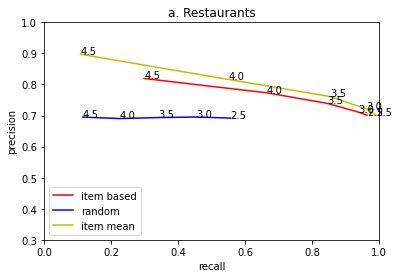

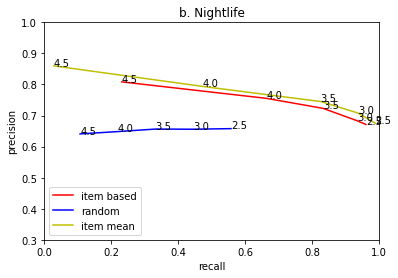

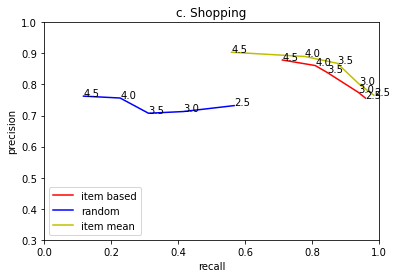

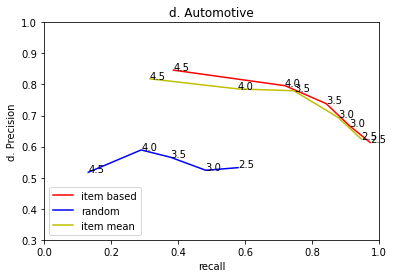

In [26]:
treshold_used = 4
treshold_recommended_list = np.arange(2.5, 5, 0.5)

def curve(categorie_ib, categorie_random, categorie_mean):
    precision_item_based_list = []
    precision_random_list = []
    precision_item_mean_list = []

    recall_item_based_list = []
    recall_random_list = []
    recall_item_mean_list = []

    for treshold_recommended in treshold_recommended_list: 
        precision_item_based, recall_item_based = evaluation(categorie_ib, treshold_recommended, treshold_used)
        precision_item_based_list.append(precision_item_based)
        recall_item_based_list.append(recall_item_based)
        plt.text(recall_item_based, precision_item_based, treshold_recommended)

        precision_random, recall_random = evaluation(categorie_random, treshold_recommended, treshold_used)
        precision_random_list.append(precision_random)
        recall_random_list.append(recall_random)
        plt.text(recall_random, precision_random, treshold_recommended)

        precision_item_mean, recall_item_mean = evaluation(categorie_mean, treshold_recommended, treshold_used)
        precision_item_mean_list.append(precision_item_mean)
        recall_item_mean_list.append(recall_item_mean)
        plt.text(recall_item_mean, precision_item_mean, treshold_recommended)
    
    return precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list

# plot voor restaurants
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_restaurants, random_restaurants, mean_restaurants)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['item based', 'random', 'item mean'], loc = 'lower left')
plt.title('a. Restaurants')
plt.show()

# plot voor nightlife
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_nightlife, random_nightlife, mean_nightlife)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['item based', 'random', 'item mean'], loc = 'lower left')
plt.title('b. Nightlife')
plt.show()

# plot voor shopping
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_shopping, random_shopping, mean_shopping)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['item based', 'random', 'item mean'], loc = 'lower left')
plt.title('c. Shopping')
plt.show()

# plot voor automotive
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_automotive, random_automotive, mean_automotive)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('d. Precision')
plt.legend(['item based', 'random', 'item mean'], loc = 'lower left')
plt.title('d. Automotive')
plt.show()

In [27]:
# Maak een lijst van recommended bedrijven per categorie voor elke user en stop in dataframe

group_restaurants = recommended_restaurants.groupby('user_id')
recommendations_restaurants = group_restaurants['business_id']
recommendations_restaurants = recommendations_restaurants.aggregate(list)
recommendations_restaurants = pd.DataFrame(recommendations_restaurants)
display(recommendations_restaurants.head())

group_nightlife = recommended_nightlife.groupby('user_id')
recommendations_nightlife = group_nightlife['business_id']
recommendations_nightlife = recommendations_nightlife.aggregate(list)
recommendations_nightlife = pd.DataFrame(recommendations_nightlife)
display(recommendations_nightlife.head())

group_shopping = recommended_shopping.groupby('user_id')
recommendations_shopping = group_shopping['business_id']
recommendations_shopping = recommendations_shopping.aggregate(list)
recommendations_shopping = pd.DataFrame(recommendations_shopping)
display(recommendations_shopping.head())

group_automotive = recommended_automotive.groupby('user_id')
recommendations_automotive = group_automotive['business_id']
recommendations_automotive = recommendations_automotive.aggregate(list)
recommendations_automotive = pd.DataFrame(recommendations_automotive)
display(recommendations_automotive.head())


,business_id
user_id,
--amZ_cR9Zgu4B1RrAHJyA,[LNsZJP6jZ11e0tDljOLPiQ]
-0-R267zNIQDPI9rxJlprQ,[NYOONIzD1T0yY9MuCglwLQ]
-0S_XaK3Q_Mesal2Unta2w,[10Jk5ilimXrfAq8JJ1gISg]
-0cu1eLTYG-TJCer9VVF9A,[TW6A7M0j0R9hp1zYpxz2FQ]
-2SzFdggGxJKY9KcfLtIUQ,[oVZsUPIMdS8Vk7Jip5l0_g]


,business_id
user_id,
--U0loZF9HaSPRzrGuiWLg,[LNsZJP6jZ11e0tDljOLPiQ]
--amZ_cR9Zgu4B1RrAHJyA,[LNsZJP6jZ11e0tDljOLPiQ]
-0452IkNZtHQbzSVf5uTwA,[bpPhyLoJYmslK8S8WB3X0w]
-3h48rG-sopyGDLu5bh4xQ,[fja2EnaSxKu1D7uctMhw-w]
-47pBscRgMbTCnSwnfcGrg,[cX2Nr_XmGYlMaBW35M0sUg]


,business_id
user_id,
--amZ_cR9Zgu4B1RrAHJyA,[-Eu04UHRqmGGyvYRDY8-tg]
-2p_A5675Eh6gcZIGkf2Yw,[-Eu04UHRqmGGyvYRDY8-tg]
-6DoXmdXEy_P5N-QZzntgA,[-Eu04UHRqmGGyvYRDY8-tg]
-Ch0GLZKtlaY8U_6NacNSg,[lywUHsU8izoUFZBSlk-npg]
-G9NOqqH_2V9dVPG0BiLyg,[rschLsESGfreHfWWJcd6eA]


,business_id
user_id,
-RWsP1Bltl5pLtIRVPGQnQ,[nxZ0URq2u4jnvD6cC0UrNQ]
-UPUYET3Pwm99zq-uHl7gg,[MQT5su7035AUTAltUfw5ug]
-zGAmT0yy3AT6tSZjQuwtg,[RLS7KuO_KNIIbhS2x9HA7w]
0_A6wEtA4-awXSxsFLaE1w,[MQT5su7035AUTAltUfw5ug]
2KnvPoE6jnBPsHwSldhKSg,[-MQZ6z1-5xVwuiuE_rngQA]


In [28]:
# Check hoeveel aanbevelingen er worden gedaan

rest = recommendations_restaurants['business_id'].apply(lambda x: len(x))
night = recommendations_nightlife['business_id'].apply(lambda x: len(x))
shop = recommendations_shopping['business_id'].apply(lambda x: len(x))
auto = recommendations_automotive['business_id'].apply(lambda x: len(x))

print('      | More than 5 recommendations  | Total users that got recommendations:')
print('------+------------------------------+--------------------------------------')
print(f'rest  |         {len(rest[rest >= 5])}                  |            {len(rest)}           ') 
print(f'night |         {len(night[night >= 5])}                  |            {len(night)}           ') 
print(f'shop  |         {len(shop[shop >= 5])}                    |            {len(shop)}           ') 
print(f'auto  |         {len(auto[auto >= 5])}                    |            {len(auto)}           ') 

      | More than 5 recommendations  | Total users that got recommendations:
------+------------------------------+--------------------------------------
rest  |         308                  |            7040           
night |         71                  |            3303           
shop  |         1                    |            468           
auto  |         0                    |            102           


In [29]:
# Maak een top 5 lijst van bedrijven per catgorie op basis van hun rating
restaurants_top5 = businesses[businesses['business_id'].isin(utility_restaurants.index)].sort_values(by='stars', ascending=False)[0:5]
nightlife_top5 = businesses[businesses['business_id'].isin(utility_nightlife.index)].sort_values(by='stars', ascending=False)[0:5]
shopping_top5 = businesses[businesses['business_id'].isin(utility_shopping.index)].sort_values(by='stars', ascending=False)[0:5]
automotive_top5 = businesses[businesses['business_id'].isin(utility_automotive.index)].sort_values(by='stars', ascending=False)[0:5]

display(restaurants_top5.head())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
884,xfCgxY_SQfzxFsQjNiLJEQ,Mitchell's Homemade Ice Cream - Cleveland,1867 W 25th St,Cleveland,OH,44113,41.485917,-81.704254,5.0,318,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Ice Cream & Frozen Yogurt","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
407,Zrq4_GDePGn8epquCUibbA,Old Brooklyn Cheese Company,4138 Pearl Rd,Cleveland,OH,44109,41.442685,-81.704679,5.0,30,1,"{'Caters': 'True', 'RestaurantsPriceRange2': '...","Meat Shops, Food, Cheese Shops, Local Flavor, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ..."
1033,Q373Y-siDCSP63rU_F3qMw,Cleveland Mofongo Latin Grill,11621 Lorain Ave,Cleveland,OH,44111,41.461742,-81.768355,5.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Latin American, Caribbean, Restaurants, ...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
2167,0S_TTdArnW8BrO-Xsp7EwQ,Mel's Cafe,2539 W 10th St,Cleveland,OH,44113,41.477245,-81.687415,5.0,28,1,"{'GoodForMeal': '{'dessert': False, 'latenight...","Diners, Food Delivery Services, Restaurants, E...","{'Tuesday': '7:0-22:0', 'Wednesday': '7:0-22:0..."
2666,d9fHu9xEmCDs9ShFIWEMZw,Kifaya's Kitchen,3650 W 117th St,Cleveland,OH,44111,41.453732,-81.769322,5.0,31,1,"{'Alcohol': 'u'none'', 'OutdoorSeating': 'Fals...","Restaurants, African, Mediterranean","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [30]:
# localiseer de users die minder dan 5 bedrijven aanbevolen hebben gekregen voor een categorie
users_missing_restaurants = recommendations_restaurants.loc[recommendations_restaurants['business_id'].map(len) < 5].index
users_missing_nightlife = recommendations_nightlife.loc[recommendations_nightlife['business_id'].map(len) < 5].index
users_missing_shopping = recommendations_shopping.loc[recommendations_shopping['business_id'].map(len) < 5].index
users_missing_automotive = recommendations_automotive.loc[recommendations_automotive['business_id'].map(len) < 5].index

display(users_missing_restaurants)

def filling_up(business_top5, amount_missing):
    '''Selecteert het missende aantal bedrijven uit de top 20 van bedrijven'''
    additional_businesses = business_top5.sample(amount_missing)['business_id'].tolist()
    return additional_businesses




Index(['--amZ_cR9Zgu4B1RrAHJyA', '-0-R267zNIQDPI9rxJlprQ',
       '-0S_XaK3Q_Mesal2Unta2w', '-0cu1eLTYG-TJCer9VVF9A',
       '-2SzFdggGxJKY9KcfLtIUQ', '-3h48rG-sopyGDLu5bh4xQ',
       '-3hAkR44yxHLylVrl6FCVw', '-4H6fFP7t-JAqQVeJ1nQxA',
       '-4L6vSCT4W2jvMgvYH4woA', '-4fn7E9Ym0w0JV63cc086A',
       ...
       'zv0-sjvfFhH4Doze4aRnoQ', 'zw6YMjaWYgpe0PQQfJbOkg',
       'zwCc2g3P6ZgvZ7EvCRWzuA', 'zwOBz9NqMkP5BD29hWn0HQ',
       'zwnlWu1Hzvp2_z34WxyNyw', 'zxA6KTqMirq7EsaIH93LSA',
       'zxL2Wdz18-Op_fBOSYEhuA', 'zxRHyxQm-32j5Z7Pi7bHCA',
       'zyrsLcN4dyRaySc257MsaQ', 'zza0WgjmkNbCfE0rLGqhXg'],
      dtype='object', name='user_id', length=6732)

In [31]:
def filler(users_missing_recommendations, recommendations_category, business_top5):
    '''vult de voorspellingen aan wanneer een user minder dan 5 voorspellingen 
    heeft voor een categorie'''
    users = []
    businesses_list = []
    for user in users_missing_recommendations:
        index = recommendations_category.loc[recommendations_category.index == user].index
        already_recommended = recommendations_category['business_id'][index]
        amount_missing = 5 - len(recommendations_category['business_id'][index])
        additional_businesses = filling_up(business_top5, amount_missing)
        businesses_list.append(additional_businesses)
        users.append(user)

    new = pd.Series(businesses_list, index = users, name = 'additional recommendations')
    final_recommendations = recommendations_category.join(new, on='user_id')
    return final_recommendations

final_restaurants = filler(users_missing_restaurants, recommendations_restaurants, restaurants_top5)
final_nightlife = filler(users_missing_nightlife, recommendations_nightlife, nightlife_top5)
final_shopping = filler(users_missing_shopping, recommendations_shopping, shopping_top5)
final_automotive = filler(users_missing_automotive, recommendations_automotive, automotive_top5)

display(final_restaurants.head())

,business_id,additional recommendations
user_id,,
--amZ_cR9Zgu4B1RrAHJyA,[LNsZJP6jZ11e0tDljOLPiQ],"[xfCgxY_SQfzxFsQjNiLJEQ, Zrq4_GDePGn8epquCUibb..."
-0-R267zNIQDPI9rxJlprQ,[NYOONIzD1T0yY9MuCglwLQ],"[xfCgxY_SQfzxFsQjNiLJEQ, Zrq4_GDePGn8epquCUibb..."
-0S_XaK3Q_Mesal2Unta2w,[10Jk5ilimXrfAq8JJ1gISg],"[Zrq4_GDePGn8epquCUibbA, d9fHu9xEmCDs9ShFIWEMZ..."
-0cu1eLTYG-TJCer9VVF9A,[TW6A7M0j0R9hp1zYpxz2FQ],"[Zrq4_GDePGn8epquCUibbA, xfCgxY_SQfzxFsQjNiLJE..."
-2SzFdggGxJKY9KcfLtIUQ,[oVZsUPIMdS8Vk7Jip5l0_g],"[d9fHu9xEmCDs9ShFIWEMZw, xfCgxY_SQfzxFsQjNiLJE..."
